In [ ]:
import sqlite3
import pandas as pd
import community
import networkx as nx

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pathlib import Path
Path('pugalanthi_data.db').touch()

In [ ]:
import itertools
import community.community_louvain


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlite3
conn = sqlite3.connect('pugalanthi_data.db')
c = conn.cursor()

In [ ]:
import pandas as pd
way = pd.read_csv('/content/drive/MyDrive/Assam location (1).csv')

In [ ]:
way.head(100)

,tweet_id,receiver_id,tweet_text,timestamp,District,location,name,hashtags,user_mentions
0,1.540000e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,Cachar,Bethukandi,IndicRWFollower ðŸ‡®ðŸ‡³,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj..."
1,1.540000e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,Cachar,Bethukandi,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin..."
2,1.540000e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,Cachar,Rammanikpur,àª¬à«àª°àª¿àªœà«‡àª¶ àªªàªŸà«‡àª² Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
3,1.540000e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,Cachar,Rammanikpur,Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
4,1.540000e+18,NaN,"RT @ErayCr: So, Assam floodsâ€”that claimed 17...",2022-07-05 13:08:01+00:00,Cachar,Rammanikpur,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu..."
...,...,...,...,...,...,...,...,...,...
95,1.540000e+18,NaN,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:01:10+00:00,Cachar,Rajnagar,Sneha Thakkar,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu..."
96,1.540000e+18,NaN,RT @RashmiDVS: The man-made floods of Assam sh...,2022-07-05 13:01:06+00:00,Cachar,Rajnagar,roshan kumar ðŸ‡®ðŸ‡³,[],"[{'screen_name': 'RashmiDVS', 'name': 'Rashmi ..."
97,1.540000e+18,NaN,RT @ExSecular: Media not debating about this â...,2022-07-05 13:01:01+00:00,Cachar,Rajnagar,Nanda Kumthekar ðŸ‡®ðŸ‡³,[],"[{'screen_name': 'ExSecular', 'name': 'exsecul..."
98,1.540000e+18,NaN,RT @ShefVaidya: The Assam floods were man-made...,2022-07-05 13:00:50+00:00,Cachar,Rajnagar,PrabathðŸ‡®ðŸ‡³,[],"[{'screen_name': 'ShefVaidya', 'name': 'Shefal..."


In [ ]:
# write the data to a sqlite table
way.to_sql('location', conn, if_exists='append', index = True)

In [ ]:
pd.read_sql('''SELECT * FROM location  ''', conn)

,index,tweet_id,receiver_id,tweet_text,timestamp,District,location,name,hashtags,user_mentions
0,0,1.540000e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,Cachar,Bethukandi,IndicRWFollower ðŸ‡®ðŸ‡³,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj..."
1,1,1.540000e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,Cachar,Bethukandi,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin..."
2,2,1.540000e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,Cachar,Rammanikpur,àª¬à«àª°àª¿àªœà«‡àª¶ àªªàªŸà«‡àª² Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
3,3,1.540000e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,Cachar,Rammanikpur,Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
4,4,1.540000e+18,NaN,"RT @ErayCr: So, Assam floodsâ€”that claimed 17...",2022-07-05 13:08:01+00:00,Cachar,Rammanikpur,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu..."
...,...,...,...,...,...,...,...,...,...,...
7579,7579,1.540000e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 05:28:56+00:00,Cachar,Subhang,: K .,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
7580,7580,1.540000e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 05:28:55+00:00,Cachar,Subhang,ThulasiramanðŸ‡®ðŸ‡³,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
7581,7581,1.540000e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 05:28:54+00:00,Cachar,Subhang,R pavan Kumar,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
7582,7582,1.540000e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 05:28:51+00:00,Cachar,Subhang,Abhishek,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."


In [ ]:
import pandas as pd
# load the data into a Pandas DataFrame
ray = pd.read_csv('/content/drive/MyDrive/Assam pincode (1).csv')

In [ ]:
ray.head()

,Office,location,District,State,Pincode
0,Aibheti,Nagaon,Nagaon,ASSAM,782002
1,Akorabori,Nagaon,Nagaon,ASSAM,782123
2,Alitangani,Nagaon,Nagaon,ASSAM,782124
3,Ambagan,Ambagan,Nagaon,ASSAM,782120
4,Ambari,Hojai,Nagaon,ASSAM,782445


In [ ]:
ray.to_sql('Pincode', conn, if_exists='append', index = True)

In [ ]:
connect = sqlite3.connect ('/content/pugalanthi_data.db')

In [ ]:
query = """
SELECT l.tweet_id, l.name, l.tweet_text, P.location, P.District, P.State, P.Pincode
FROM [location] AS l JOIN Pincode AS P ON l.location = P.location
ORDER BY l.location
 
"""

In [ ]:
df = pd.read_sql(query, connect)

In [ ]:
df.head(400)

,tweet_id,name,tweet_text,location,District,State,Pincode
0,1.540000e+18,Swithw Basumatary,RT @AbhishBanerj: Why is this not biggest news...,Angardhowa,Nalbari,ASSAM,781344
1,1.540000e+18,Priya Iyengar,"RT @ShefVaidya: In last few weeks, #KanhaiyaLa...",Angardhowa,Nalbari,ASSAM,781344
2,1.540000e+18,Geralt Of Rivia,"RT @ErayCr: So, Assam floodsâ€”that claimed 17...",Angardhowa,Nalbari,ASSAM,781344
3,1.540000e+18,shubham SAHU,"RT @ShefVaidya: In last few weeks, #KanhaiyaLa...",Angardhowa,Nalbari,ASSAM,781344
4,1.540000e+18,à¤®à¥à¤¨à¥à¤¨à¤¾ à¤¸à¤¿à¤‚à¤¹ (MUNNA SINGH),RT @AbhishBanerj: Why is this not biggest news...,Angardhowa,Nalbari,ASSAM,781344
...,...,...,...,...,...,...,...
395,1.540000e+18,satish.tanksale,RT @AbhishBanerj: Why is this not biggest news...,Belsor,Nalbari,ASSAM,781304
396,1.540000e+18,justShilpS,RT @AbhishBanerj: Why is this not biggest news...,Belsor,Nalbari,ASSAM,781304
397,1.540000e+18,justShilpS,RT @AbhishBanerj: Why is this not biggest news...,Belsor,Nalbari,ASSAM,781304
398,1.540000e+18,justShilpS,RT @AbhishBanerj: Why is this not biggest news...,Belsor,Nalbari,ASSAM,781304


In [ ]:
df.tail(400)

,tweet_id,name,tweet_text,location,District,State,Pincode
1608,1.540000e+18,Nutan Kumar,"RT @ShefVaidya: In last few weeks, #KanhaiyaLa...",Dhemaji,Dhemaji,ASSAM,787026
1609,1.540000e+18,Nutan Kumar,"RT @ShefVaidya: In last few weeks, #KanhaiyaLa...",Dhemaji,Dhemaji,ASSAM,787057
1610,1.540000e+18,Nutan Kumar,"RT @ShefVaidya: In last few weeks, #KanhaiyaLa...",Dhemaji,Dhemaji,ASSAM,787057
1611,1.540000e+18,Nutan Kumar,"RT @ShefVaidya: In last few weeks, #KanhaiyaLa...",Dhemaji,Dhemaji,ASSAM,787057
1612,1.540000e+18,Nutan Kumar,"RT @ShefVaidya: In last few weeks, #KanhaiyaLa...",Dhemaji,Dhemaji,ASSAM,787057
...,...,...,...,...,...,...,...
2003,1.540000e+18,Saurabh Gada,RT @sunandavashisht: Assam: Mithu Hussain Lask...,Dhemaji,Dhemaji,ASSAM,787057
2004,1.540000e+18,Saurabh Gada,RT @sunandavashisht: Assam: Mithu Hussain Lask...,Dhemaji,Dhemaji,ASSAM,787057
2005,1.540000e+18,Saurabh Gada,RT @sunandavashisht: Assam: Mithu Hussain Lask...,Dhemaji,Dhemaji,ASSAM,787057
2006,1.540000e+18,Saurabh Gada,RT @sunandavashisht: Assam: Mithu Hussain Lask...,Dhemaji,Dhemaji,ASSAM,787057


In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
for p, a in df.groupby('Pincode')['name']: 
    for u, v in itertools.combinations(a, 2):
        if G.has_edge(u, v):
            G[u][v]['weight']  = 2
        else:
            G.add_edge(u, v, weight=1)

In [ ]:
print('\nSize of graph, i.e. number of edges:', G.size())


Size of graph, i.e. number of edges: 15988


In [ ]:
import community
import community.community_louvain 
partition = community.community_louvain.best_partition(G)

In [ ]:
print('Modularity: ', community.community_louvain.modularity(partition, G))

Modularity:  0.759322130295495


In [ ]:
import sqlite3
import pandas as pd
import community
import networkx as nx

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pathlib import Path
Path('pugal_data.db').touch()

In [ ]:
import itertools
import community.community_louvain


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import networkx as nx
G = nx.from_pandas_edgelist(df, source='location',target='name', create_using=nx.Graph())

In [ ]:
print(nx.info(G))

Graph with 489 nodes and 502 edges


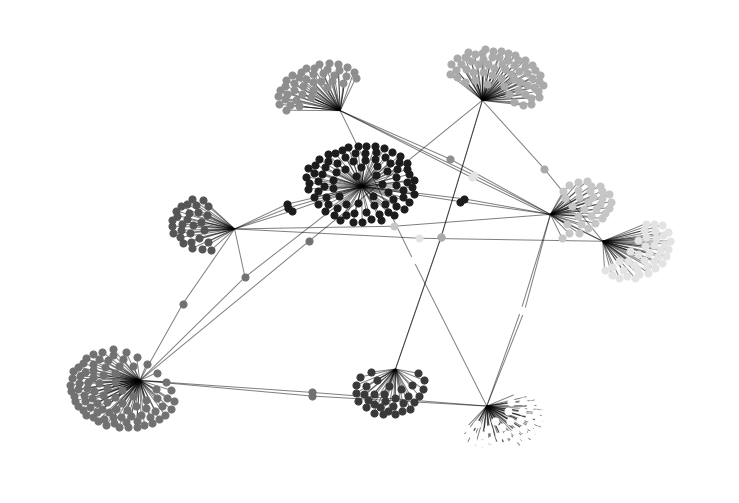

In [ ]:
plt.figure(figsize=(13, 9))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
centers = {}
communities = {}
G_main_com = G.copy()
min_nb = 50
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) > min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.harmonic_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        print('Community of ', center , '(ID ', com, ') ')
        print(list_nodes, '\n')
        print(center, '(ID ', com, ')','is influencer of ', len (list_nodes),'influential nodes')
        print(list_nodes, '\n')

Community of  Vikas (ID  1 ) 
['Prabhakar kumar', 'Funjabi Afeemchi - ðŸ‡®ðŸ‡³', 'spideroftheweb', 'Srividya ðŸ‡®ðŸ‡³ ðŸš©', 'Raghuveer Reddy', 'Shubhangi Parlikar', 'thenationalist', 'Mukyaprana', 'Joydeep Sen', 'Bing!', 'd kumar', 'à¥\x90 à¤\xadà¤¾à¤°à¤¤ à¥\x90 ðŸ‡®ðŸ‡³', 'RahulBadghare', 'Ram', 'rajiv', 'Anand Sharma', 'Ameya Jagdale', 'ð\x9d“•ð\x9d“ªð\x9d“¼ð\x9d“½ð\x9d“®ð\x9d“» ð\x9d“•ð\x9d“®ð\x9d“·ð\x9d“®', 'Ráµƒáµ\x8fáµ‰Ë¢Ê° à²°à²¾à²•à³‡à²¶à³\x8d ðŸ‡®ðŸ‡³', 'openness', 'Radha Padmanabhan', 'S', 'Rahul A', 'Vikas', 'Gif Giffer Giffest', 'gunesh', 'Neeta Parmar', 'à¤¸à¥\x81à¤®à¥‡à¤§à¤¾', 'Naren Mukherjee ðŸ‡®ðŸ‡³', 'Nagarajan', 'BHAARAT ðŸ‡®ðŸ‡³', 'Naveen Jhawar', 'Jeuti Devi'] 

Vikas (ID  1 ) is influencer of  33 influential nodes
['Prabhakar kumar', 'Funjabi Afeemchi - ðŸ‡®ðŸ‡³', 'spideroftheweb', 'Srividya ðŸ‡®ðŸ‡³ ðŸš©', 'Raghuveer Reddy', 'Shubhangi Parlikar', 'thenationalist', 'Mukyaprana', 'Joydeep Sen', 'Bing!', 'd kumar', 'à¥\x90 à¤\xadà¤¾à¤°à¤¤ à¥\x90 ðŸ‡®ðŸ‡³', 'RahulBa

In [ ]:
import folium
import pandas as pd

map = folium.Map(location=[26.2006043,92.9375739], zoom_start=8)

folium.Marker(
    location=[24.833946, 92.779282],
    popup =" Tweet_id:1544227788411900000, influencer name: Vikas, Location: Assam University, District: Silchar,Cachar",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(map)


folium.Marker(
    location=[26.4460377, 91.4372506],
    popup=" Tweet_id: 1544272425931500000, influencer name: haresh dhapodkar	, Location: Bhadra, District: Nalbari ",
    icon=folium.Icon(color="red", icon = 'info-sign' ),
).add_to(map)


folium.Marker(
    location=[27.284800, 94.344800],
    popup=" Tweet_id: 1544288727924500000, influencer name: Alok Jaiswal	, Location: Dhemaji, District: Dhemaji ",
    icon=folium.Icon(color="red", icon = 'info-sign' ),
).add_to(map)

folium.Marker(
    location=[26.6515023, 91.3927489],
    popup=" Tweet_id: 1544270122545600000, influencer name: TheBlessedOne	, Location: Dhanbil, District: Nalbari ",
    icon=folium.Icon(color="red", icon = 'info-sign' ),
).add_to(map)

folium.Marker(
    location=[26.27863, 91.30975],
    popup=" Tweet_id: 1544281512606000000 , influencer name: Priya Iyengar	, Location: Angardhowa, District: Nalbari ",
    icon=folium.Icon(color="red", icon = 'info-sign' ),
).add_to(map)

folium.Marker(
    location=[26.089,	93.38825],
    popup=" Tweet_id: 1544281410273400000 , influencer name: Swithw Basumatary, Location: Karayani , District: Hojai ",
    icon=folium.Icon(color="red", icon = 'info-sign' ),
).add_to(map)

folium.Marker(
    location=[26.089,	93.38825],
    popup=" Tweet_id: 1544281410273400000 , influencer name: Swithw Basumatary, Location: Karayani , District: Hojai ",
    icon=folium.Icon(color="red", icon = 'info-sign' ),
).add_to(map)

map